# Weather Dataset - Temperature Prediction

In [15]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
import statistics 
import scipy
import math
import seaborn as sns
%matplotlib inline

In [16]:
# Importing dataset into data frame variable
df = pd.read_csv("WeatherHistoryDataset.csv")

#printing the first 5 rows of the dataset
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2012-04-01 00:00:00.000 +0200,Breezy and Overcast,rain,9.444444,5.511111111,0.52,35.42,340,16.1,0,1002.8,Partly cloudy until evening and breezy in the ...
1,2012-04-01 01:00:00.000 +0200,Mostly Cloudy,rain,8.333333,5.194444444,0.45,20.93,320,16.1,0,1004.1,Partly cloudy until evening and breezy in the ...
2,2012-04-01 02:00:00.000 +0200,Breezy and Mostly Cloudy,rain,6.855556,2.244444444,0.54,33.2304,322,15.1501,0,1004.97,Partly cloudy until evening and breezy in the ...
3,2012-04-01 03:00:00.000 +0200,Mostly Cloudy,rain,6.111111,1.888888889,0.57,25.76,310,16.1,0,1005.9,Partly cloudy until evening and breezy in the ...
4,2012-04-01 04:00:00.000 +0200,Breezy and Overcast,rain,6.111111,1.605555556,0.51,28.98,310,16.1,0,1006,Partly cloudy until evening and breezy in the ...


In [17]:
# Finding out the general information about the dataset
df.describe()

,Temperature (C),Loud Cover
count,35077.000000,35077.0
mean,12.190872,0.0
std,9.549309,0.0
min,-21.822222,0.0
25%,4.911111,0.0
50%,12.150000,0.0
75%,18.894444,0.0
max,38.861111,0.0


In [18]:
# Since the NaN values are represented as " " it has to be converted to NaN value so that we can clean the data efficiently
df = df.replace(" ", np.nan)

In [19]:
# Counting the number of NaN values through each column
df.isnull().sum()

Formatted Date              0
Summary                   203
Precip Type               144
Temperature (C)             0
Apparent Temperature ©    199
Humidity                  144
Wind Speed (km/h)         260
Wind Bearing (degrees)    178
Visibility (km)           253
Loud Cover                  0
Pressure (millibars)      159
Daily Summary               0
dtype: int64

# Exploratory Data Analysis:

### _Description_: 

- **Formatted Date**: Date in yyyy-mm-dd hr(in 24 hr format) format.
- **Summary**: Summary of weather.
- **Precip Type**: Type of precipitation.
- **Temperature**: Temperature in degrees Centigrade.
- **Apparent Temperature Â©**: Apparent temperature in degrees Centigrade.
- **humidity**: Humidity at recorded time.
- **Wind Speed**: Wind speed in km/hrs.
- **Wind Bearing**: Wind Bearing in degrees.
- **Visibility**: Visibility in km.

In [20]:
# Removing rows where the Precip type and Summary is NaN

df = df[df["Precip Type"].notna()]
df = df[df["Summary"].notna()]

In [21]:
# Dropping the Loud Cover column as it does not contain useful information

df.drop('Loud Cover', inplace=True, axis=1)

In [22]:
# Preparing the Label Encoder

le = preprocessing.LabelEncoder()

# Encoding the values of Precip Type and Summary to unique values so that we can use them for analysis

df["Precip Type"] = le.fit_transform(df["Precip Type"])
df["Summary"] = le.fit_transform(df["Summary"])

In [23]:
# Imputing the NaN values with the mean strategy 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.iloc[:,4:10].values)
df.iloc[:,4:10] = imputer.transform(df.iloc[:,4:10].values)

In [24]:
# Removing the duplicate rows

df.drop_duplicates(subset ="Formatted Date", keep = False, inplace = True)

# Graph Visualisation

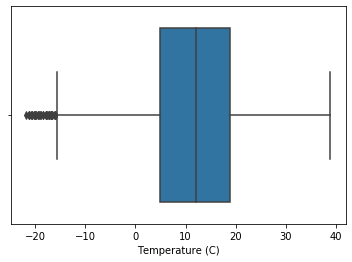

In [25]:
import seaborn as sns
#visualizing the data in boxplots to get information on the outliers
sns.boxplot(x=df['Temperature (C)'])    

In [26]:
#removal of outliers 
Q1 = df['Temperature (C)'].quantile(0.25)   #first quartile
Q3 = df['Temperature (C)'].quantile(0.75)   #third quartile
IQR = Q3 - Q1   #IQR-> Interquartile Range

filter = (df['Temperature (C)'] >= Q1 - 1.5 * IQR) & (df['Temperature (C)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

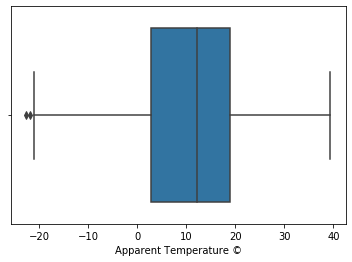

In [27]:
sns.boxplot(x=df['Apparent Temperature ©'])

In [28]:
Q1 = df['Apparent Temperature ©'].quantile(0.25)
Q3 = df['Apparent Temperature ©'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Apparent Temperature ©'] >= Q1 - 1.5 * IQR) & (df['Apparent Temperature ©'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

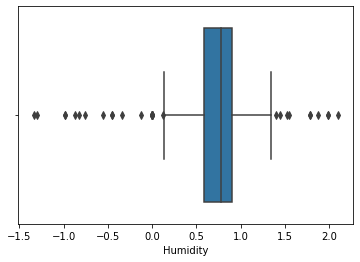

In [29]:
sns.boxplot(x=df['Humidity'])

In [30]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Humidity'] >= Q1 - 1.5 * IQR) & (df['Humidity'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

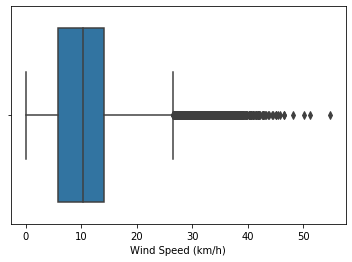

In [31]:
sns.boxplot(x=df['Wind Speed (km/h)'])

In [32]:
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Speed (km/h)'] >= Q1 - 1.5 * IQR) & (df['Wind Speed (km/h)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

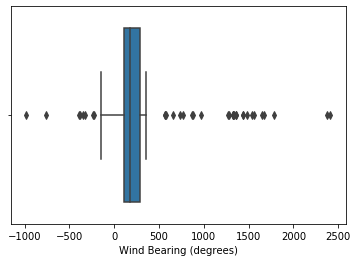

In [33]:
sns.boxplot(x=df['Wind Bearing (degrees)'])

In [34]:
Q1 = df['Wind Bearing (degrees)'].quantile(0.25)
Q3 = df['Wind Bearing (degrees)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Bearing (degrees)'] >= Q1 - 1.5 * IQR) & (df['Wind Bearing (degrees)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

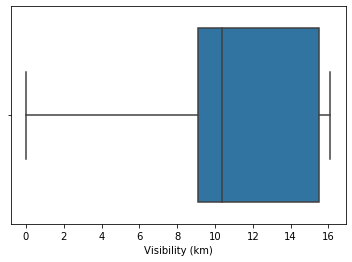

In [35]:
sns.boxplot(x=df['Visibility (km)'])

In [36]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Visibility (km)'] >= Q1 - 1.5 * IQR) & (df['Visibility (km)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

In [37]:
df['Pressure (millibars)']=df['Pressure (millibars)'].astype(float)   #converting to float type

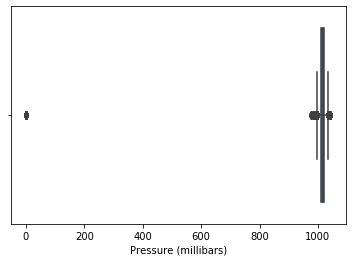

In [38]:
sns.boxplot(x=df['Pressure (millibars)'])

In [39]:
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Pressure (millibars)'] >= Q1 - 1.5 * IQR) & (df['Pressure (millibars)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  
df     #outliers removed

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
1,2012-04-01 01:00:00.000 +0200,16,0,8.333333,5.194444,0.450000,20.9300,320.0,16.1000,1004.10,Partly cloudy until evening and breezy in the ...
3,2012-04-01 03:00:00.000 +0200,16,0,6.111111,1.888889,0.570000,25.7600,310.0,16.1000,1005.90,Partly cloudy until evening and breezy in the ...
6,2012-04-01 06:00:00.000 +0200,16,0,3.888889,-0.805556,0.731044,24.1500,330.0,9.9820,1008.30,Partly cloudy until evening and breezy in the ...
7,2012-04-01 07:00:00.000 +0200,16,0,2.777778,-2.038889,0.520000,22.5400,320.0,9.9820,1010.30,Partly cloudy until evening and breezy in the ...
11,2012-04-01 11:00:00.000 +0200,18,0,7.711111,3.900000,0.380000,26.3235,329.0,10.3684,1012.74,Partly cloudy until evening and breezy in the ...
...,...,...,...,...,...,...,...,...,...,...,...
35072,2015-09-09 19:00:00.000 +0200,18,0,16.011111,16.011111,0.460000,0.1288,340.0,16.1000,1019.23,Partly cloudy starting in the morning continui...
35073,2015-09-09 20:00:00.000 +0200,18,0,13.061111,13.061111,0.550000,6.9552,331.0,15.5526,1019.81,Partly cloudy starting in the morning continui...
35074,2015-09-09 21:00:00.000 +0200,18,0,11.161111,11.161111,0.670000,7.9212,352.0,16.1000,1020.33,Partly cloudy starting in the morning continui...
35075,2015-09-09 22:00:00.000 +0200,6,0,10.583333,10.583333,0.690000,6.4239,342.0,16.1000,1019.75,Partly cloudy starting in the morning continui...


<BarContainer object of 31796 artists>

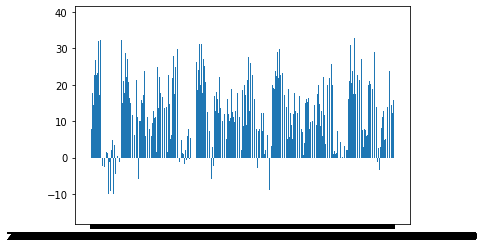

In [26]:
#graph visualisation - BAR GRAPH
#1.Temperature vs Date
plt.bar(x=df['Formatted Date'], height=df['Temperature (C)'])  

<BarContainer object of 31796 artists>

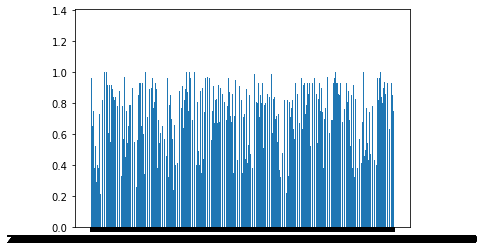

In [27]:
#2.Humidatity vs Date
plt.bar(x=df['Formatted Date'], height=df['Humidity'])

<BarContainer object of 31796 artists>

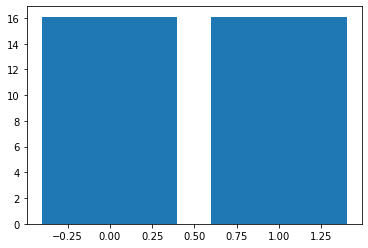

In [28]:
#3. Visibility vs precip type
plt.bar(x=df['Precip Type'], height=df['Visibility (km)'])

<BarContainer object of 31796 artists>

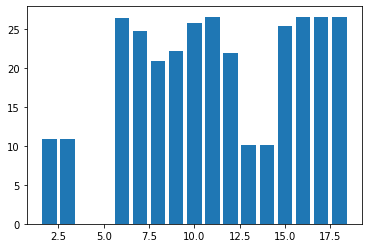

In [29]:
#4. wind speed vs Summary
plt.bar(x=df['Summary'], height=df['Wind Speed (km/h)'])

<BarContainer object of 31796 artists>

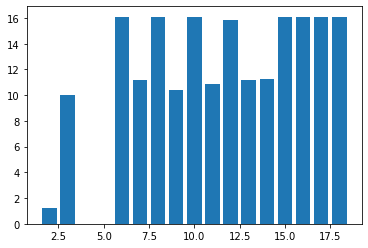

In [30]:
#5.visibility vs Summary
plt.bar(x=df['Summary'], height=df['Visibility (km)'])

## Normalization and Standardization

In [40]:
# Calculating mean of all required columns
df[['Summary','Precip Type','Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].mean()

Summary                     15.517451
Precip Type                  0.088504
Temperature (C)             12.677395
Apparent Temperature ©      11.736231
Humidity                     0.730901
Wind Speed (km/h)           10.151795
Wind Bearing (degrees)     183.649361
Visibility (km)             11.029687
Pressure (millibars)      1016.667810
dtype: float64

In [41]:
# Calculating variance of all required columns
df[['Summary','Precip Type','Temperature (C)','Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].var()

Summary                      12.810391
Precip Type                   0.080673
Temperature (C)              89.044259
Apparent Temperature ©      109.531888
Humidity                      0.040541
Wind Speed (km/h)            34.233790
Wind Bearing (degrees)    11663.676822
Visibility (km)              19.631730
Pressure (millibars)         47.672279
dtype: float64

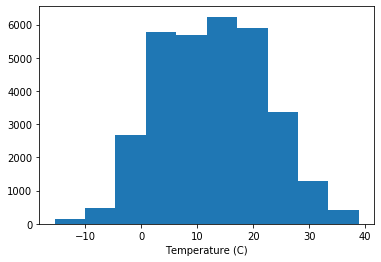

In [43]:
pyplot.hist(df['Temperature (C)'])
plt.xlabel('Temperature (C)')
pyplot.show()

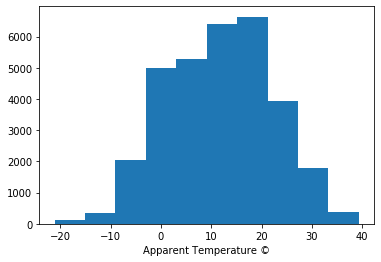

In [44]:
pyplot.hist(df['Apparent Temperature ©'])
plt.xlabel('Apparent Temperature ©')
pyplot.show()

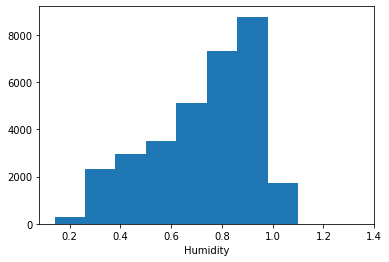

In [45]:
pyplot.hist(df['Humidity'])
plt.xlabel('Humidity')
pyplot.show()

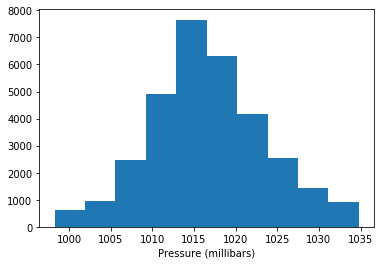

In [48]:
pyplot.hist(df['Pressure (millibars)'])
plt.xlabel('Pressure (millibars)')
pyplot.show()

In [51]:
cols = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Create x, where x is the values of cols as floats
x = df[cols].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_normalized

,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.438426,0.435537,0.258333,0.787879,0.922311,1.000,0.160055
1,0.397547,0.380900,0.358333,0.969697,0.902390,1.000,0.209302
2,0.356668,0.336364,0.492537,0.909091,0.942231,0.620,0.274966
3,0.336229,0.315978,0.316667,0.848485,0.922311,0.620,0.329685
4,0.426980,0.414141,0.200000,0.990909,0.940239,0.644,0.396443
...,...,...,...,...,...,...,...
31971,0.579663,0.614325,0.266667,0.004848,0.962151,1.000,0.574008
31972,0.525396,0.565565,0.341667,0.261818,0.944223,0.966,0.589877
31973,0.490445,0.534160,0.441667,0.298182,0.986056,1.000,0.604104
31974,0.479816,0.524610,0.458333,0.241818,0.966135,1.000,0.588235


## Need for Normalization and it's effects on the Dataset

    -> In the context of machine learning and data science, normalization takes the values from the database and where they are numeric columns, changes them into a common scale. 
    -> The main benefits of normalization in analytical terms are that it allows faster searching and sorting as it is better at creating indexes via smaller, logical tables. 
    -> Also, in having more tables, there is a better use of segments to control the tangible placement of data. There will be fewer nulls and redundant data after modelling any necessary columns and bias/issues with anomalies are greatly reduced by removing the differences in scale. 
    -> In summary, data normalization processes ensure that our data is structured logically and scaled proportionally where required, generally on a scale of 0 to 1. It tends to be used where you have predefined assumptions of your model. 
    -> By ensuring you have normalized data, the likelihood of success in your machine learning and data science projects vastly improves. 
    -> It is vital that organizations invest as much in ensuring the quality of their data as they do in the analytical and scientific models that are created by it. Preparation is everything in a successful data strategy.

(array([ 133.,  490., 2679., 5774., 5694., 6239., 5905., 3358., 1298.,
         406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

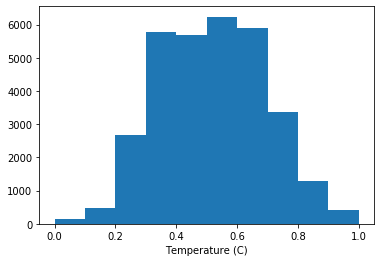

In [54]:
plt.xlabel('Temperature (C)')
pyplot.hist(df_normalized['Temperature (C)'])

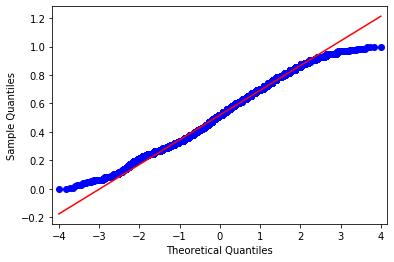

In [32]:
qqplot(df_normalized['Temperature (C)'], line = 's')
pyplot.show()

(array([ 133.,  362., 2060., 4984., 5272., 6408., 6635., 3939., 1797.,
         386.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

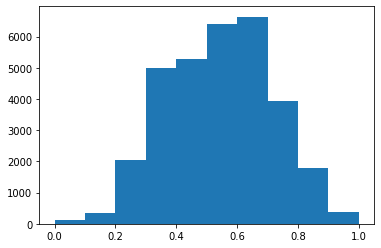

In [52]:
plt.xlabel('Apparent Temperature ©')
pyplot.hist(df_normalized['Apparent Temperature ©'])

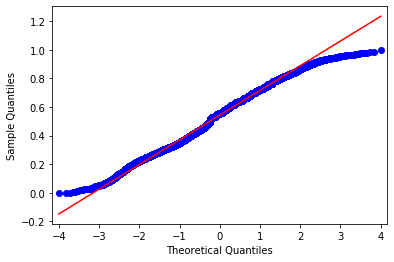

In [53]:
qqplot(df_normalized['Apparent Temperature ©'], line = 's')
pyplot.show()

(array([3.850e+02, 2.217e+03, 2.951e+03, 3.502e+03, 5.120e+03, 7.306e+03,
        8.764e+03, 1.727e+03, 0.000e+00, 4.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

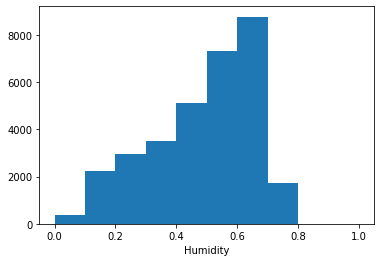

In [55]:
plt.xlabel('Humidity')
pyplot.hist(df_normalized['Humidity'])

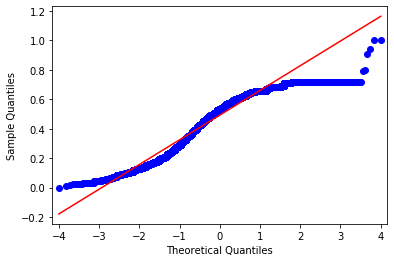

In [56]:
qqplot(df_normalized['Humidity'], line = 's')
pyplot.show()

(array([1658., 6220., 4750., 4779., 5832., 3787., 1827., 1319., 1032.,
         772.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

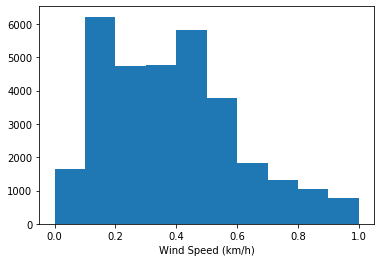

In [57]:
plt.xlabel('Wind Speed (km/h)')
pyplot.hist(df_normalized['Wind Speed (km/h)'])

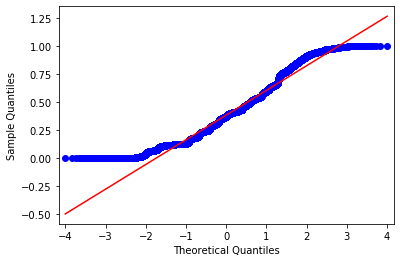

In [58]:
qqplot(df_normalized['Wind Speed (km/h)'], line = 's')
pyplot.show()

(array([3.000e+00, 0.000e+00, 1.319e+03, 4.455e+03, 2.040e+03, 5.867e+03,
        5.115e+03, 2.958e+03, 4.452e+03, 5.767e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

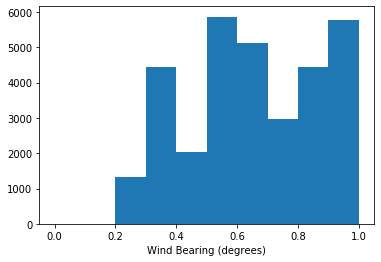

In [59]:
plt.xlabel('Wind Bearing (degrees)')
pyplot.hist(df_normalized['Wind Bearing (degrees)'])

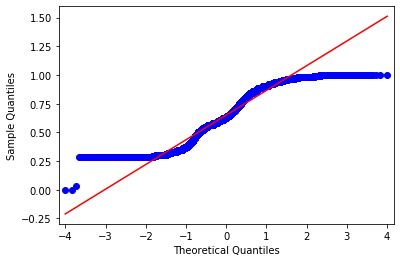

In [60]:
qqplot(df_normalized['Wind Bearing (degrees)'], line = 's')
pyplot.show()

(array([ 1424.,   937.,  1375.,  1539.,  1350.,  1315., 10759.,  1071.,
          488., 11718.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

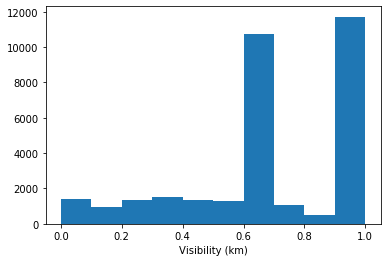

In [61]:
plt.xlabel('Visibility (km)')
pyplot.hist(df_normalized['Visibility (km)'])

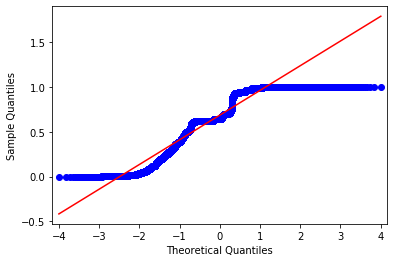

In [62]:
qqplot(df_normalized['Visibility (km)'], line = 's')
pyplot.show()

(array([ 607.,  972., 2449., 4932., 7638., 6322., 4152., 2549., 1439.,
         916.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

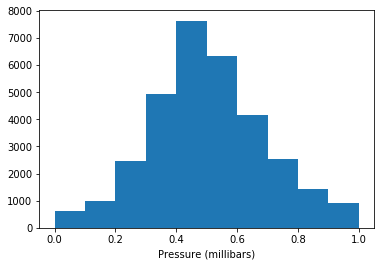

In [63]:
plt.xlabel('Pressure (millibars)')
pyplot.hist(df_normalized['Pressure (millibars)'])

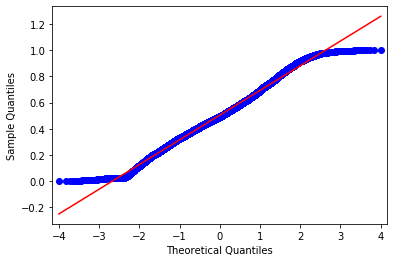

In [64]:
qqplot(df_normalized['Pressure (millibars)'], line = 's')
pyplot.show()

## Testing of Hypothesis:

### 1. For Column Temperature (C)

In [33]:
# Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Temparature is 12 degree C (mu=12)
H0="The mean Temparature is 12 degree C (mu=12)"

#Alternate Hypothesis
# H1: The mean Temparature is not equal to 12 degree C (mu != 12)
H1="The mean Temparature is not equal to 12 degree C (mu != 12)"

population_mean_from_hypothesis=12

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Temparature is 12 degree C (mu=12)
z_score=-11792.6404743390
p_value=1.0000000000
sample_mean=0.5185355505
sample_sd=0.1736090943
The test is 2 tailed test


### 2. For Column Temperature (C)

In [34]:
# Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Temparature is greater than or equal to 14 degree C (mu >= 14)
H0="The mean Temparature is greater than or equal to 14 degree C (mu>=14)"

#Alternate Hypothesis
# H1: The mean Temparature is less than 14 degree C (mu < 14)
H1="The mean Temparature is less than 14 degree C (mu < 14)"

population_mean_from_hypothesis=14

#determining if the test is one tailed or two tailed and alloting alpha value

test="one_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Temparature is greater than or equal to 14 degree C (mu>=14)
z_score=-13846.8454106791
p_value=1.0000000000
sample_mean=0.5185355505
sample_sd=0.1736090943
The test is 1 tailed test


### 3. For Apparent Temperature ©

In [35]:
#Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Apparent Temperature ©"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Apparent Temperature © is 11.5 degree © (mu=11.5)
H0="The mean Apparent Temperature © is 11.5 degree © (mu=11.5)"

#Alternate Hypothesis
# H1: The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)
H1="The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)"

population_mean_from_hypothesis=11.5

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Apparent Temperature © is 11.5 degree © (mu=11.5)
z_score=-11293.4062375726
p_value=1.0000000000
sample_mean=0.5438570423
sample_sd=0.1729891975
The test is 2 tailed test


### 4. For Humidity

In [36]:
#Find sample mean and sample standard deviation
number_of_values=len(df) #no of values in the column
Sample_data=df["Humidity"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

#Hypothesis
#Null Hypothesis
# H0: The mean Humidity is equal to 0.8  (mu=11.5)
H0="The mean Humidity is equal to 0.8  (mu=11.5)"

#Alternate Hypothesis
# H1: The mean Humidity is not equal to 0.8  (mu=11.5)
H1="The mean Humidity is not equal to 0.8  (mu=11.5)"

population_mean_from_hypothesis=0.8

#determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Humidity is equal to 0.8  (mu=11.5)
z_score=-326.9551145891
p_value=1.0000000000
sample_mean=0.4923181324
sample_sd=0.1678031123
The test is 2 tailed test


# Correlation Test - Pearson Correlation

In [37]:
# Creating a function to find out if samples are correlated or not

def corr_test_Pearson(FirstSample,SecondSample):
    
    from scipy.stats import pearsonr
    correlation_const, p_value = pearsonr(FirstSample, SecondSample)

    # Conclusions on the data if they are dependent or independent using p-value
    print('stat=%.5f, p=%5f' % (correlation_const, p_value))
    if p_value > 0.05:
        print('independent samples')
    else:
        print('dependent samples')

    # Conclusions on correlation constant
    if(correlation_const>0.6 and p_value < 0.05):
        print("The given First and Second sample are positively correlated.")
    elif(correlation_const<-0.6 and p_value < 0.05):
        print("The given First and Second sample are negatively correlated.")
    else:
        print("The given First and Second sample are not correlated.")

### 1.Correlation test on Temperature (C) and Apparent Temperature ©

In [38]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Apparent Temperature ©'])

stat=0.99076, p=0.000000
dependent samples
The given First and Second sample are positively correlated.


### 2.Correlation test on Temperature (C) and Humidity

In [39]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Humidity'])

stat=-0.63832, p=0.000000
dependent samples
The given First and Second sample are negatively correlated.


### 3.Correlation test on Temperature (C) and Wind Speed (km/h)

In [40]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Speed (km/h)'])

stat=0.02147, p=0.000129
dependent samples
The given First and Second sample are not correlated.


### 4.Correlation test on Temperature (C) and Wind Bearing (degrees)

In [41]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Bearing (degrees)'])

stat=0.03311, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 5.Correlation test on Temperature (C) and Visibility (km)	

In [42]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Visibility (km)'])

stat=0.39597, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 6.Correlation test on Temperature (C) and Pressure (millibars)

In [43]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Pressure (millibars)'])

stat=-0.30926, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 7.Correlation test on Humidity and Wind Speed (km/h)

In [44]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Speed (km/h)'])

stat=0.02147, p=0.000129
dependent samples
The given First and Second sample are not correlated.


### Correlation Graph

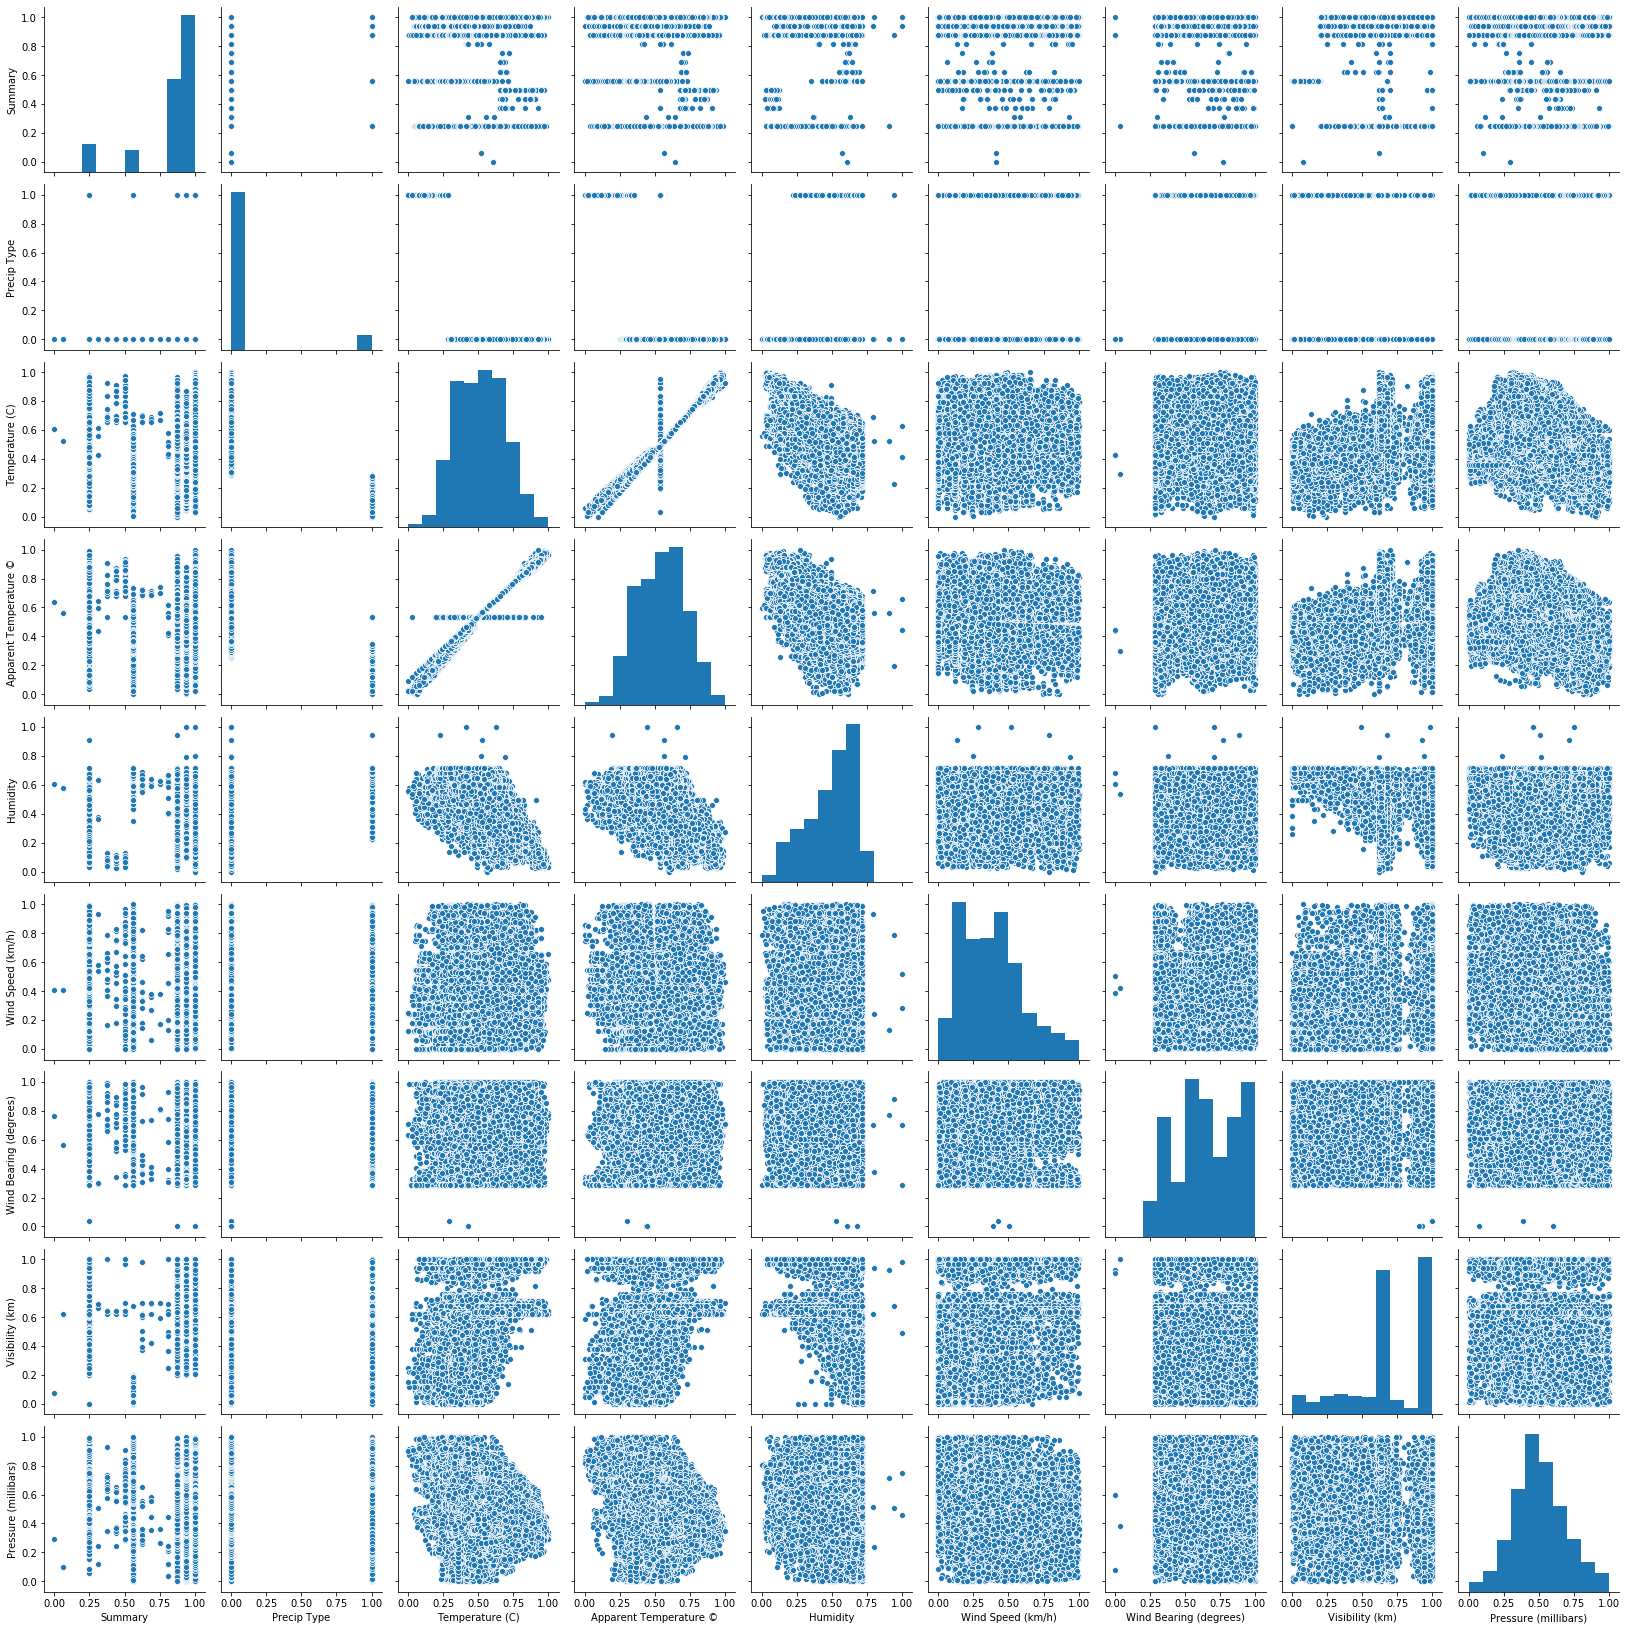

In [45]:
# Plotting the correlation graphs 

sns.pairplot(df)
plt.show()

## Feature Selection:

In [46]:
# Selecting the features that will help in prediction

features = ['Summary','Precip Type','Apparent Temperature ©','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
X = df[features] 
y = df["Temperature (C)"]

## Linear Regression:

In [47]:
# split data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [48]:
# Fitting simple linear regression to training set 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Predicting the test set results

y_pred = regressor.predict(X_test)

In [50]:
# Finding the error in the prediction , lower the error better the accuracy

from sklearn.metrics import mean_squared_error
score = math.sqrt(mean_squared_error(y_test, y_pred))

score

0.020998700619729253

ValueError: x and y must be the same size

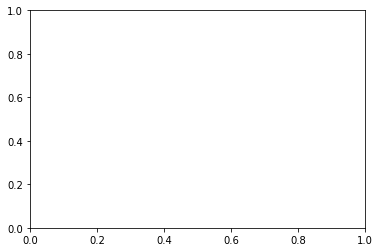

In [51]:
# Plotting the graph showing the best fit predicted values

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()